<a href="https://colab.research.google.com/github/Chanura04/ML-Coursework/blob/main/20240955.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
!pip install keras-tuner

In [ ]:
import pandas as pd
from google.colab import drive
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import keras_tuner as kt
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras import layers, regularizers
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (
    StratifiedKFold, RandomizedSearchCV, GridSearchCV, cross_val_score
)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)

## Load the dataset

In [ ]:
# drive.mount('/content/drive')

In [ ]:
# dataset_path = '/content/drive/MyDrive/ML IIT/coursework/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [ ]:
url = "https://raw.githubusercontent.com/Chanura04/ML-Coursework/main/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv"

## Check dataset behaviour

In [ ]:
df=pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
categorical_cols=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod',"Churn"]
numerical_cols=['MonthlyCharges','TotalCharges','tenure']

In [ ]:
#corr_matrix=df[numerical_cols].corr()
#corr_matrix

#This will shows error because the TotalCharges data type is string.

In [ ]:
def convert_to_numeric(value):
    try:
        return float(value)
    except ValueError:
        return None

df['TotalCharges'] = df['TotalCharges'].apply(convert_to_numeric)

In [ ]:
corr_matrix=df[numerical_cols].corr()
corr_matrix

,MonthlyCharges,TotalCharges,tenure
MonthlyCharges,1.000000,0.651065,0.24790
TotalCharges,0.651065,1.000000,0.82588
tenure,0.247900,0.825880,1.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Categorical Variables Distribution

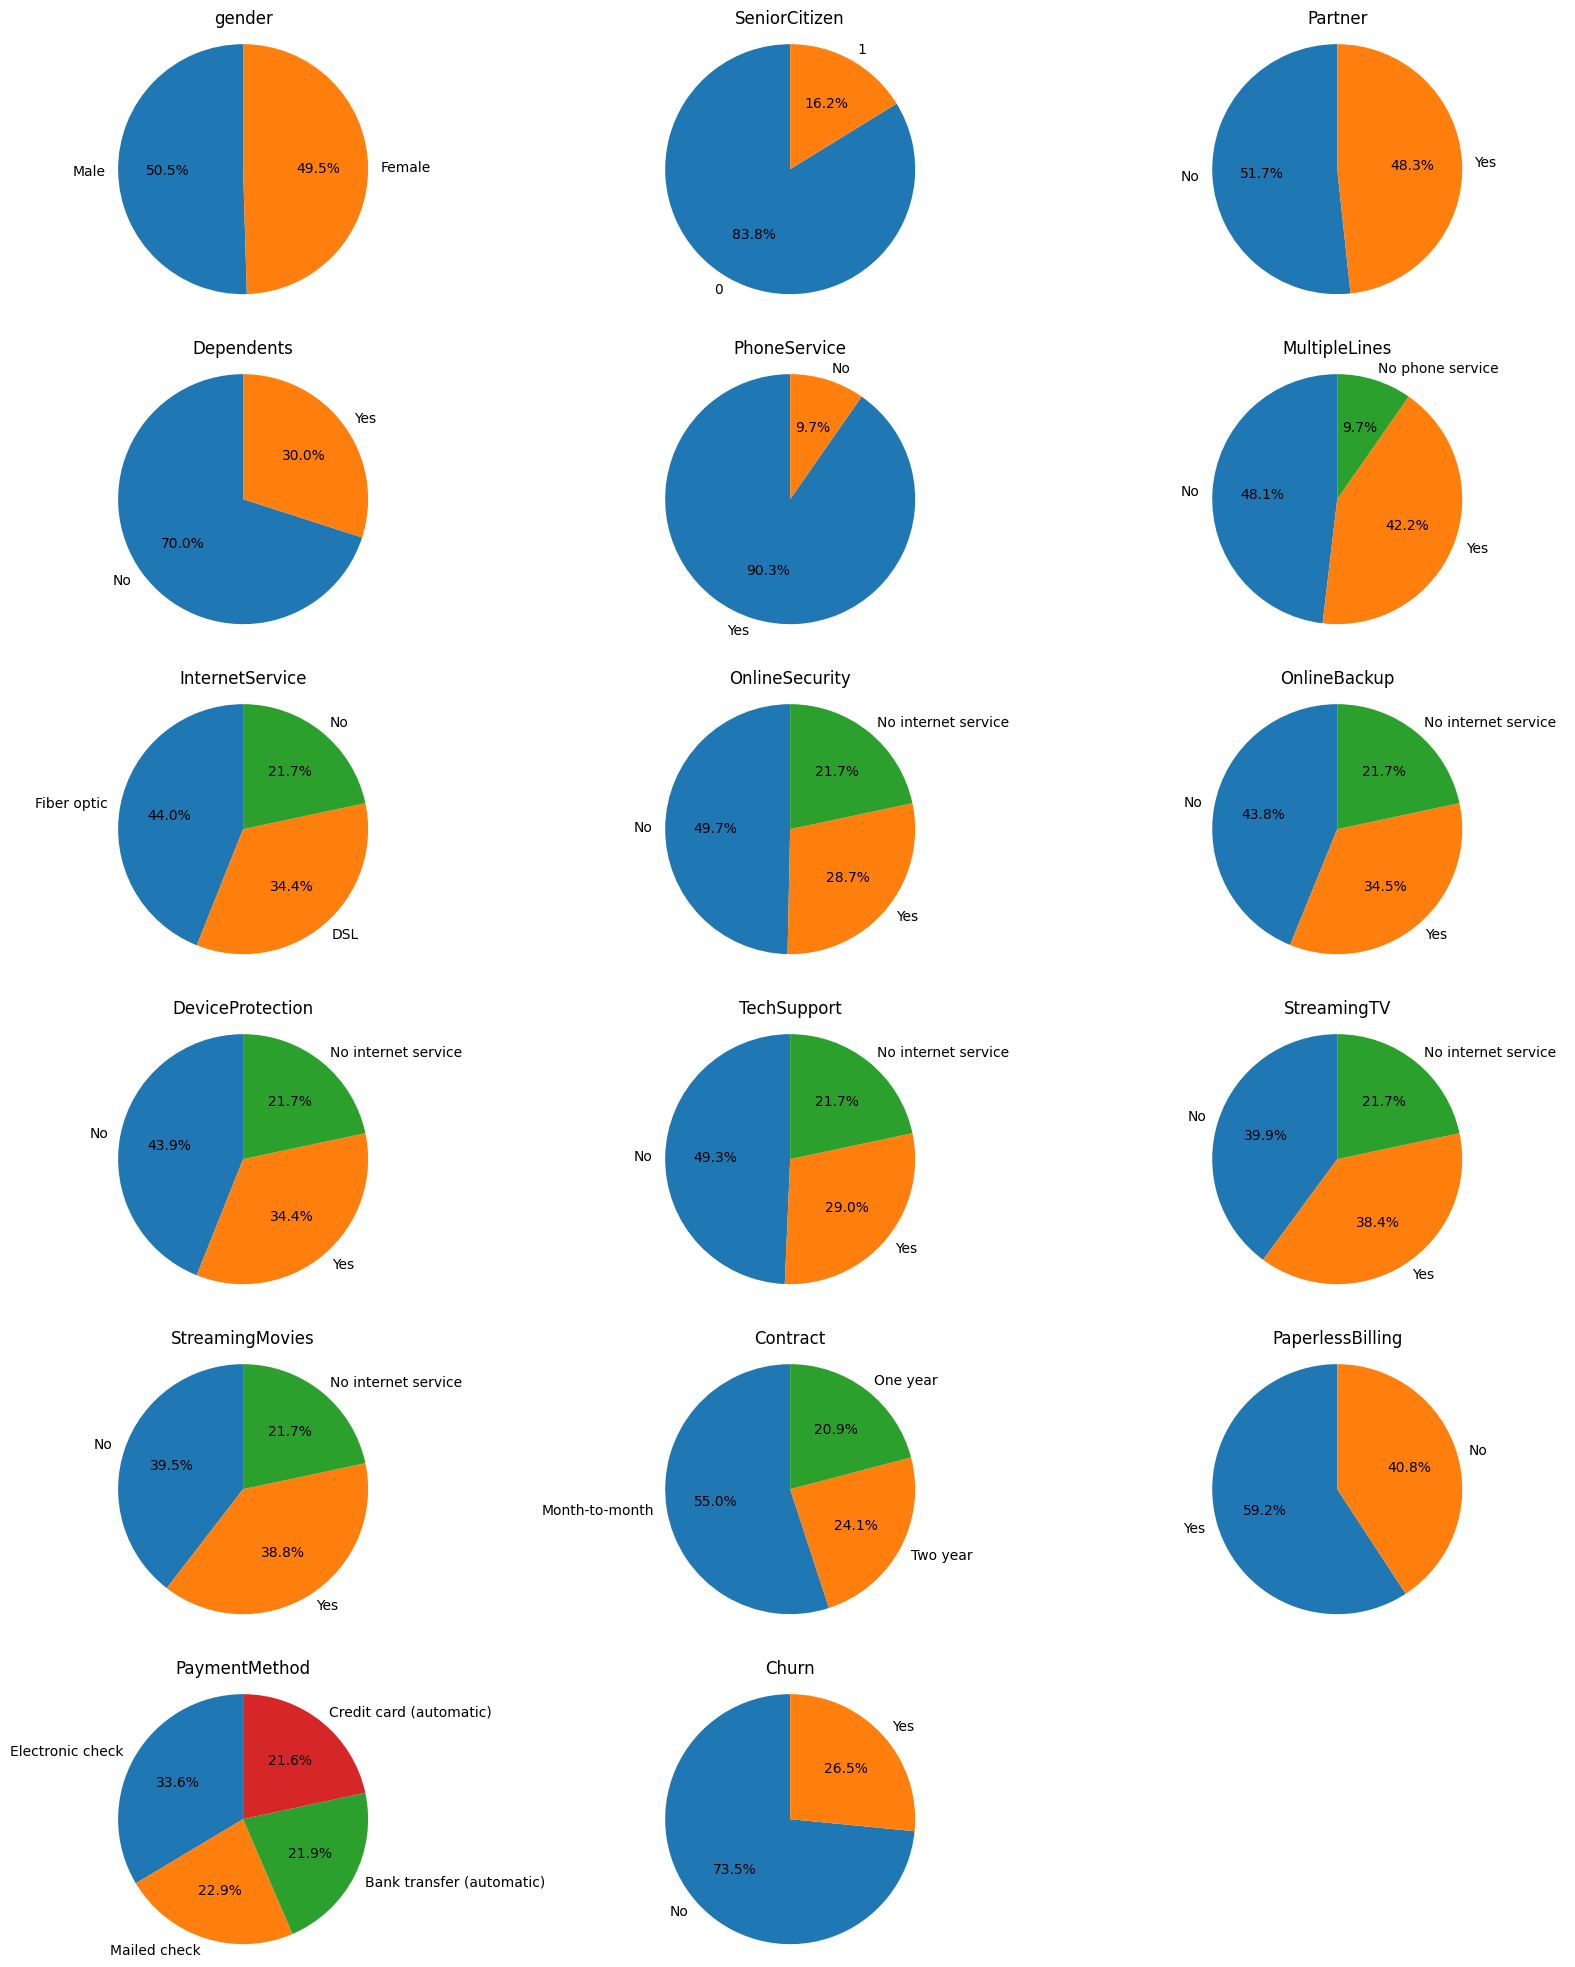

In [ ]:
plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_cols):
    plt.subplot(6, 3, i + 1)
    plt.pie(df[col].value_counts().values, labels=df[col].value_counts().index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {col}')
    plt.axis('equal')
    plt.title(col)
plt.show()

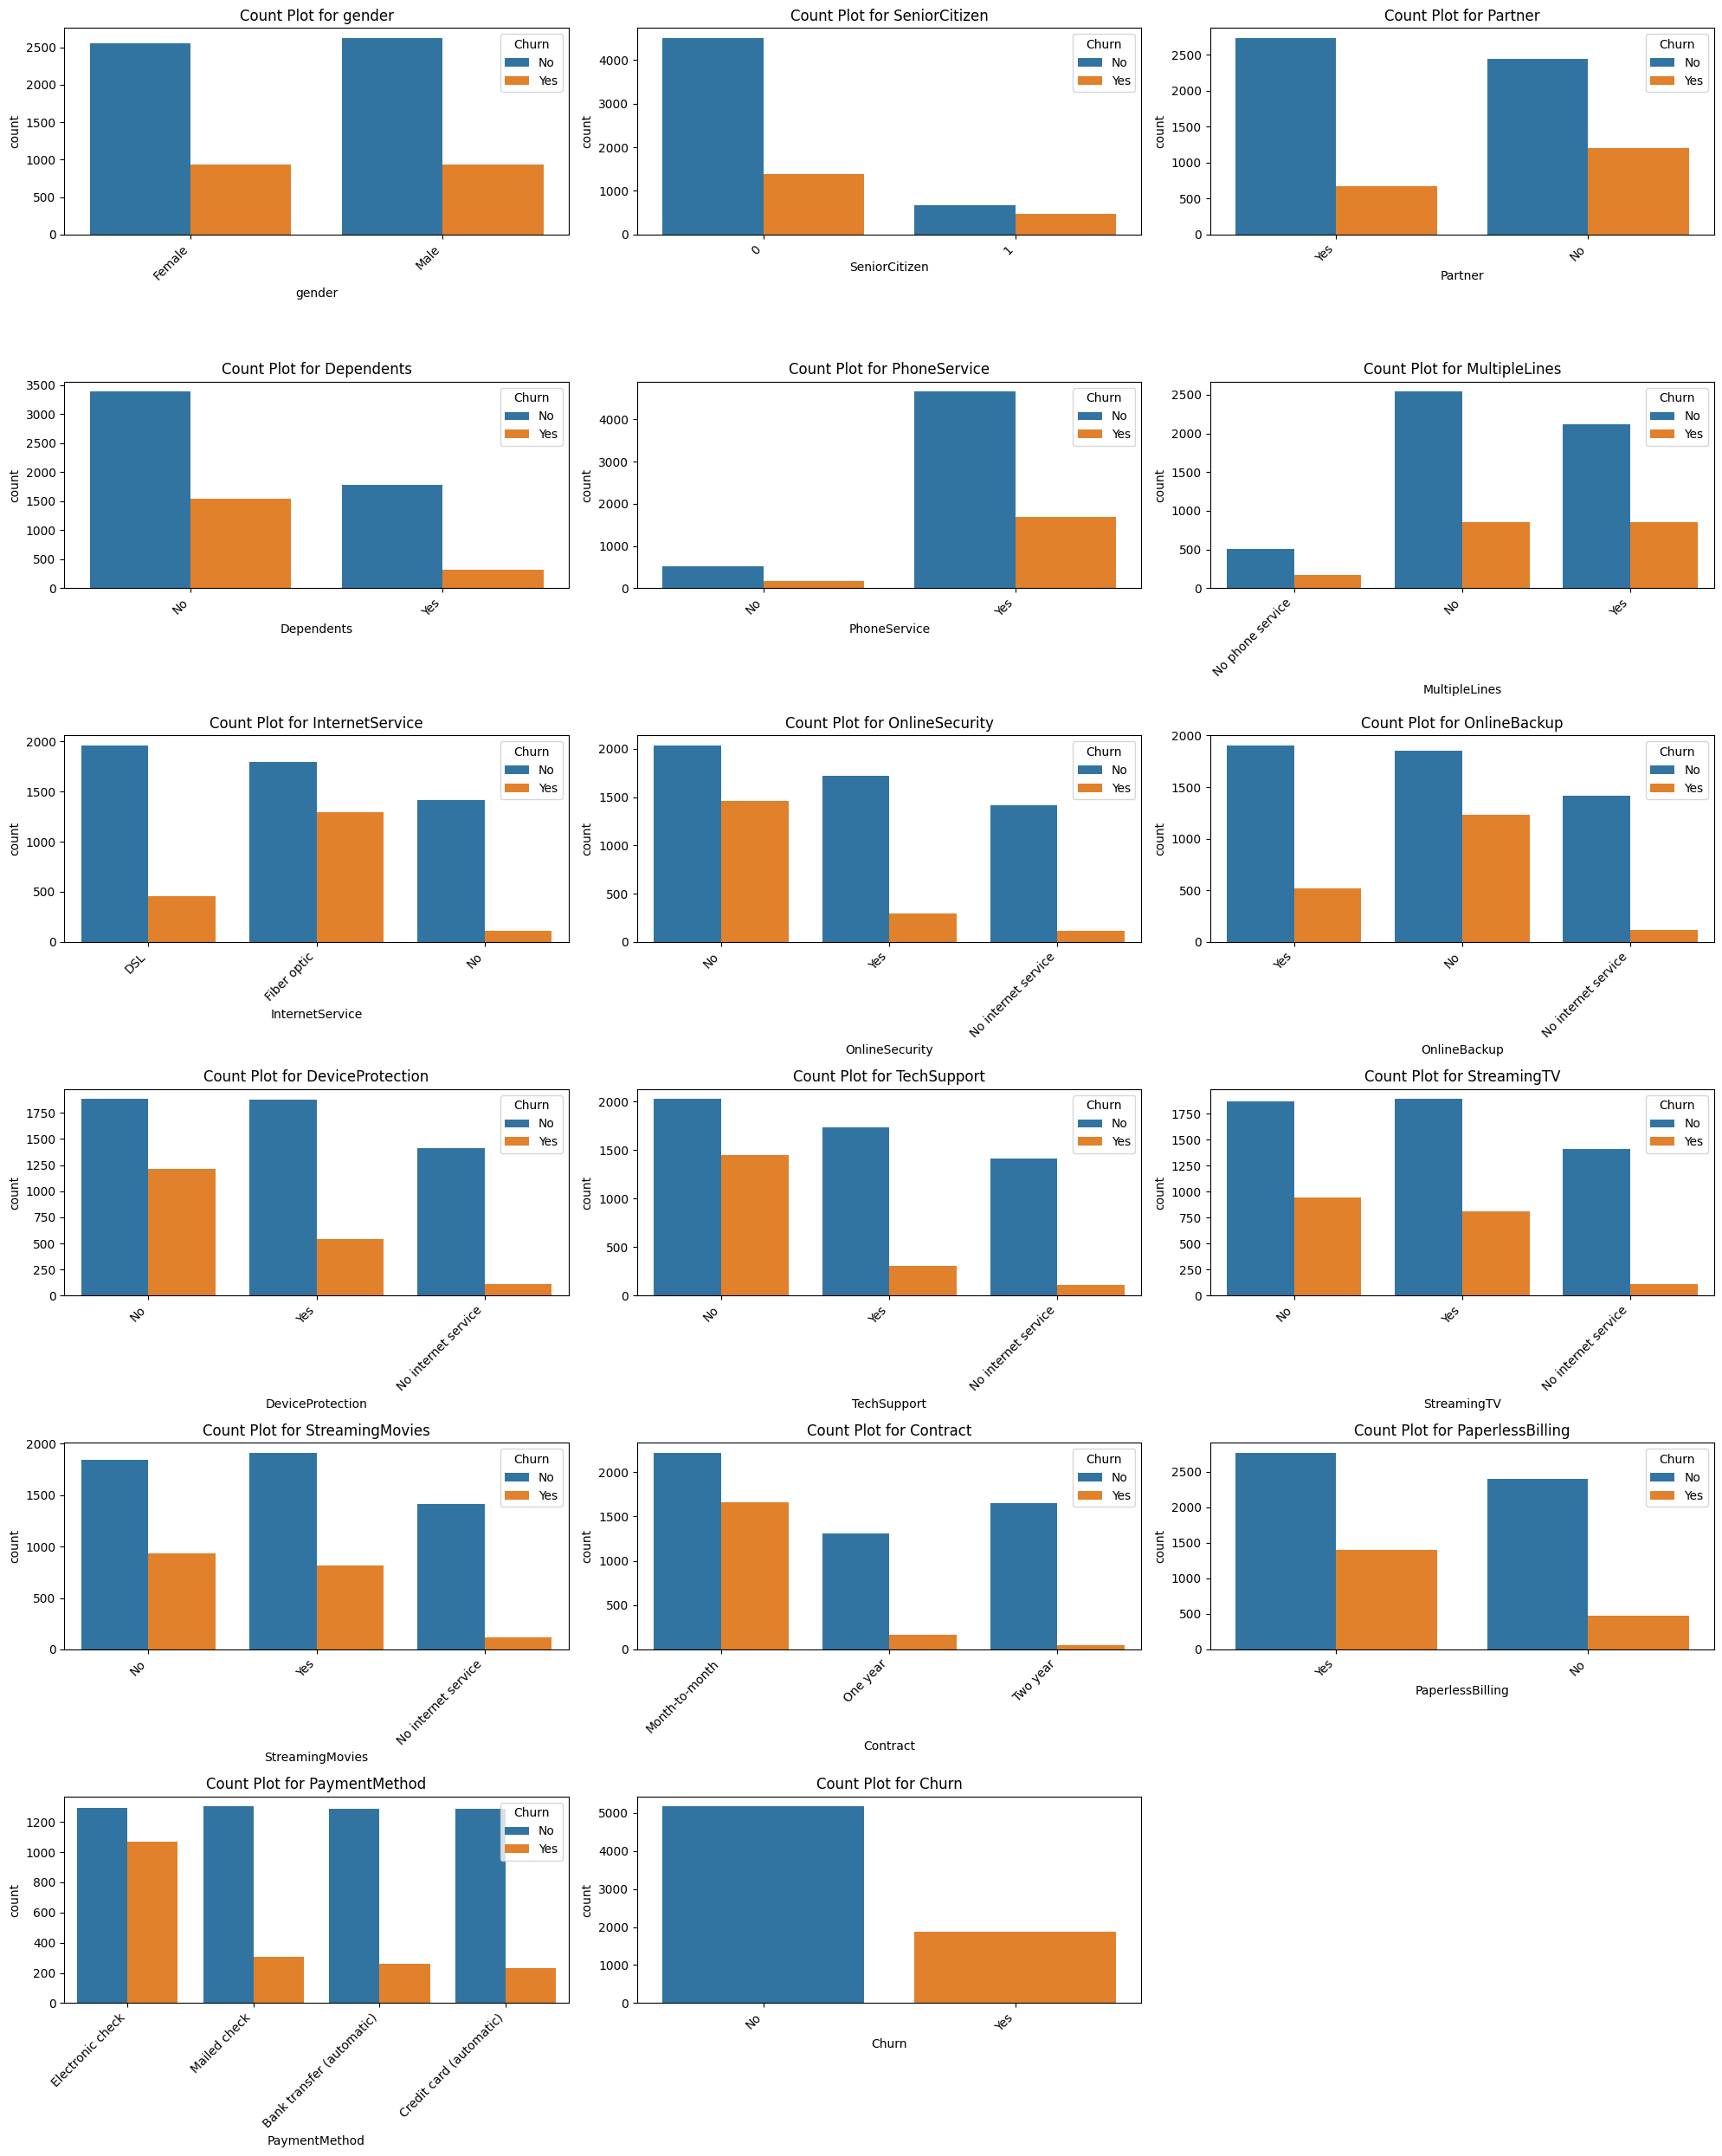

In [ ]:
plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_cols):
    plt.subplot(6, 3, i + 1)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Numerical Variables Distribution

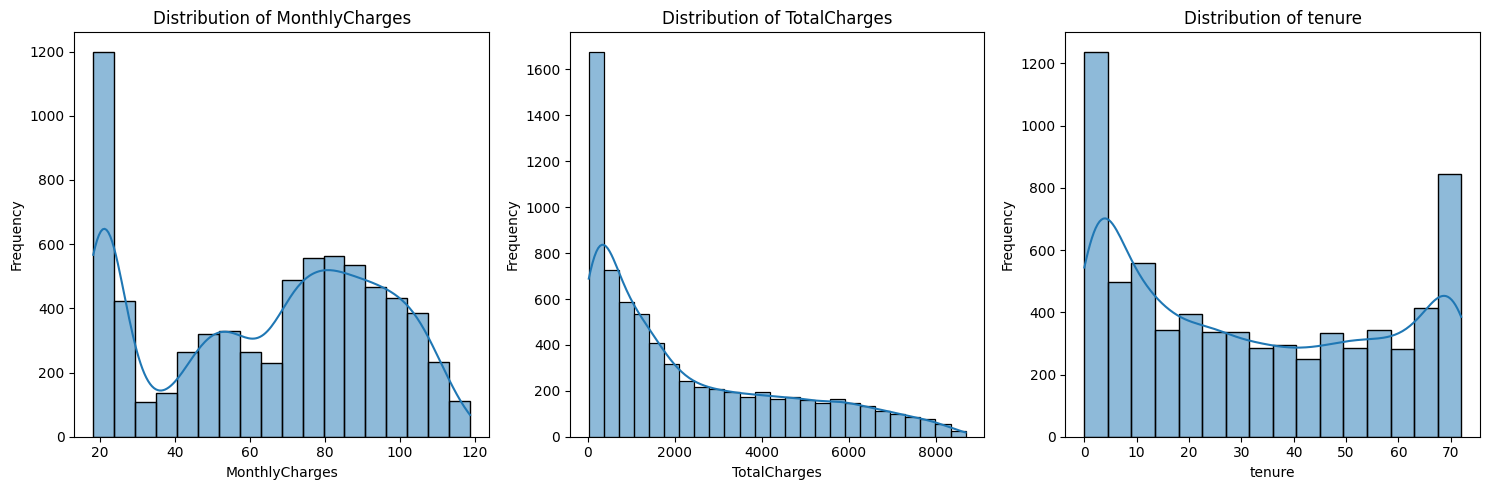

In [ ]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

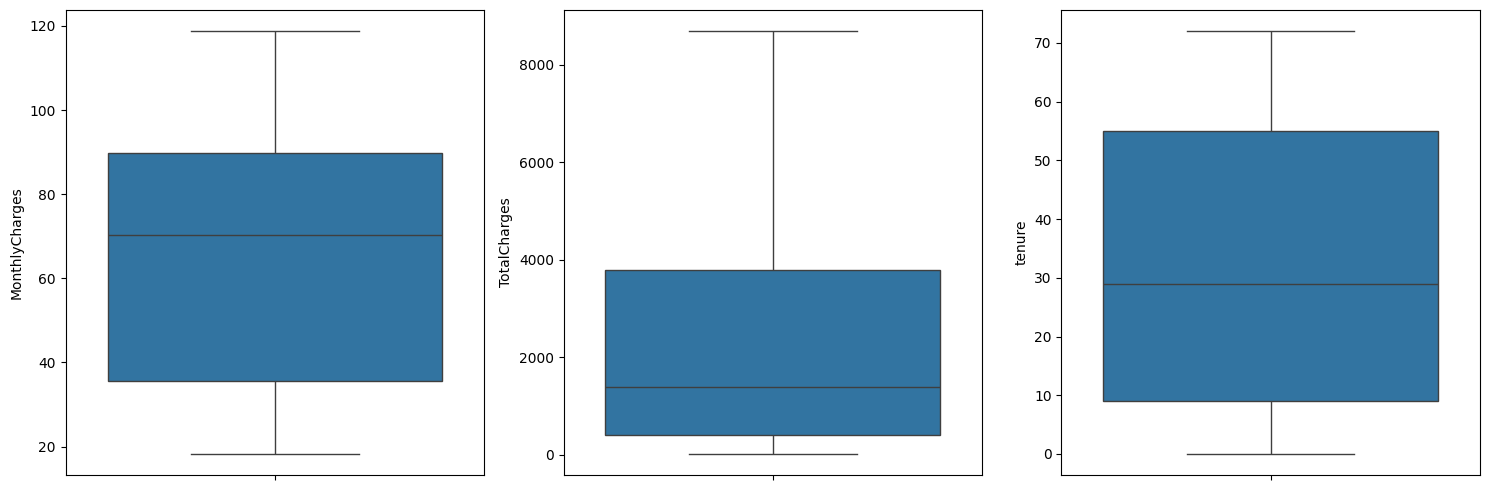

In [ ]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df[col])
    # plt.title(f'{col} by Churn')
    # plt.xlabel('Churn')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## Data Preprocessing

In [ ]:
categorical_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
numerical_cols

['MonthlyCharges', 'TotalCharges', 'tenure']

In [ ]:
df_cp=df.copy()

In [ ]:
df_cp = df_cp.drop(columns=['customerID'])
df_cp.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
len(df_cp.columns)

20

In [ ]:
df_cp.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df_cp.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df_cp['TotalCharges']=df_cp['TotalCharges'].fillna(df_cp['TotalCharges'].median())

In [ ]:
df_cp.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
for col in df_cp.columns:
  # print(col)
  value=df_cp[col].value_counts()
  print(value)
  print('*'*50)
  print("\n")

gender
Male      3555
Female    3488
Name: count, dtype: int64
**************************************************


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
**************************************************


Partner
No     3641
Yes    3402
Name: count, dtype: int64
**************************************************


Dependents
No     4933
Yes    2110
Name: count, dtype: int64
**************************************************


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
**************************************************


PhoneService
Yes    6361
No      682
Name: count, dtype: int64
**************************************************


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
**************************************************


InternetService
Fiber optic    3096
DSL            242

In [ ]:
for col in df_cp.columns:
  print("\n")
  print(col)
  print(df_cp[col].unique())

  print("\n")
  print('*'*50)




gender
['Female' 'Male']


**************************************************


SeniorCitizen
[0 1]


**************************************************


Partner
['Yes' 'No']


**************************************************


Dependents
['No' 'Yes']


**************************************************


tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


**************************************************


PhoneService
['No' 'Yes']


**************************************************


MultipleLines
['No phone service' 'No' 'Yes']


**************************************************


InternetService
['DSL' 'Fiber optic' 'No']


**************************************************


OnlineSecurity
['No' 'Yes' 'No internet service']


**************************************************


OnlineBackup
['Ye

In [ ]:
# In this dataset there are some features both represent same meaning.Here i convert those to one
df_cp['MultipleLines'] = df_cp['MultipleLines'].replace('No phone service', 'No')
df_cp[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
      'TechSupport', 'StreamingTV', 'StreamingMovies']] = df_cp[['OnlineSecurity', 'OnlineBackup',
                                                                'DeviceProtection', 'TechSupport',
                                                                'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')

In [ ]:
df_cp

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
# SeniorCitizen is binary categorical feature
categorical_cols=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod',"Churn"]
numerical_cols=['MonthlyCharges','TotalCharges','tenure']
len(categorical_cols)

17

In [ ]:
label_encoding_columns=['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']
one_hot_encoding_columns=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

len(label_encoding_columns)+len(one_hot_encoding_columns)

16

<Axes: >

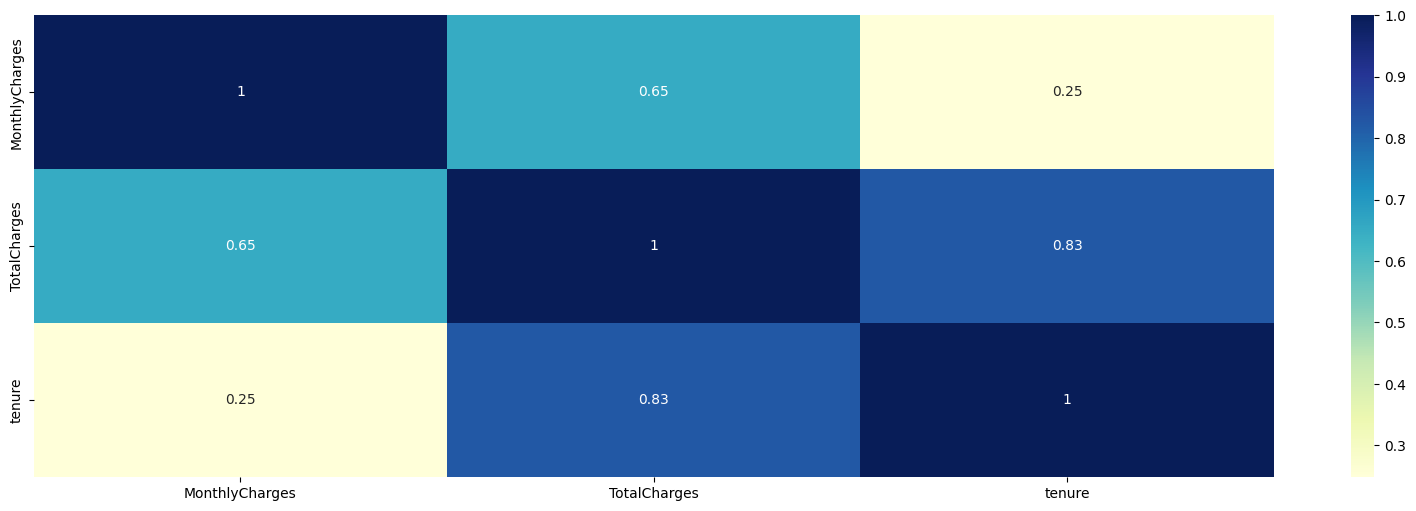

In [ ]:
plt.figure(figsize=(20, 6))
sns.heatmap(df_cp[numerical_cols].corr(), cmap = 'YlGnBu', annot = True)

#### Label Encoding

In [ ]:
#Label encoding method use for binary categories
l_encoder=LabelEncoder()

for col in label_encoding_columns:
  df_cp[col]=l_encoder.fit_transform(df_cp[col])

In [ ]:
df_cp.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


#### One-Hot Encoding

In [ ]:
#One-Hot encoder use for multi class categories
oneHot_encoder=OneHotEncoder(sparse_output=False,drop=None)
encoded_data=oneHot_encoder.fit_transform(df_cp[one_hot_encoding_columns])
oneHot_encoded_df=pd.DataFrame(encoded_data,columns=oneHot_encoder.get_feature_names_out(one_hot_encoding_columns))

In [ ]:
df_cp_final=df_cp.drop(columns=one_hot_encoding_columns)
df_cp_final=pd.concat([df_cp_final,oneHot_encoded_df],axis=1)
df_cp_final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Scale Numerical Features

In [ ]:
std_sclr=StandardScaler()

for col in numerical_cols:
  df_cp_final[col]=std_sclr.fit_transform(df_cp_final[[col]])

df_cp_final

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.994242,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,0.066327,1,0,-0.259629,-0.173244,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,-1.236724,1,1,-0.362660,-0.959674,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,0.514251,0,0,-0.746535,-0.194766,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,-1.236724,1,1,0.197365,-0.940470,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.340876,1,1,0.665992,-0.128655,0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,0,0,1,1,1.613701,1,1,1.277533,2.243151,0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,0,0,1,1,-0.870241,0,1,-1.168632,-0.854469,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1,1,1,0,-1.155283,1,1,0.320338,-0.872062,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
for col in df_cp.columns:
  print("\n")
  print(col)
  print(df_cp[col].unique())

  print("\n")
  print('*'*50)



gender
[0 1]


**************************************************


SeniorCitizen
[0 1]


**************************************************


Partner
[1 0]


**************************************************


Dependents
[0 1]


**************************************************


tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


**************************************************


PhoneService
[0 1]


**************************************************


MultipleLines
['No' 'Yes']


**************************************************


InternetService
['DSL' 'Fiber optic' 'No']


**************************************************


OnlineSecurity
['No' 'Yes']


**************************************************


OnlineBackup
['Yes' 'No']


**************************************************


DeviceProt

#### Handle class imbalance

In [ ]:
df_cp_final['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [ ]:
# Need to handle this,because of this class imbalance ML model can become biased toward the majority class

In [ ]:
df_cp_final.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
PaperlessBilling,0
MonthlyCharges,0
TotalCharges,0
Churn,0


In [ ]:
X=df_cp_final.drop(columns=['Churn'],axis=1)
y=df_cp_final['Churn']


In [ ]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.994242,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,0.066327,1,0,-0.259629,-0.173244,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,-1.236724,1,1,-0.362660,-0.959674,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,0.514251,0,0,-0.746535,-0.194766,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,-1.236724,1,1,0.197365,-0.940470,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.340876,1,1,0.665992,-0.128655,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,0,0,1,1,1.613701,1,1,1.277533,2.243151,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,0,0,1,1,-0.870241,0,1,-1.168632,-0.854469,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1,1,1,0,-1.155283,1,1,0.320338,-0.872062,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [ ]:
smote=SMOTE(random_state=42)
X_resampled,y_resampled=smote.fit_resample(X,y)

In [ ]:
y_resampled.value_counts()

,count
Churn,
0,5174
1,5174


Text(0.5, 1.0, 'Count Plot for Churn')

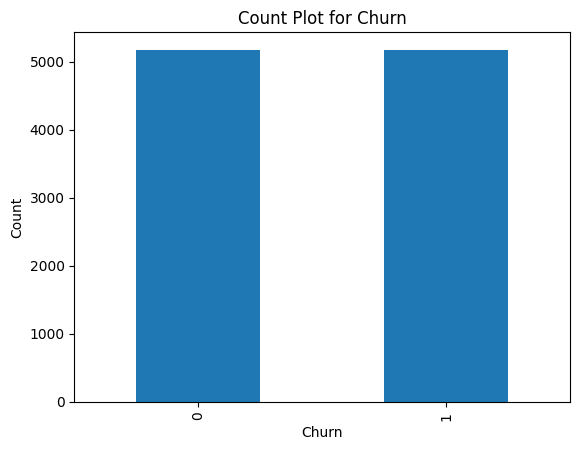

In [ ]:
count=y_resampled.value_counts()
count.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count Plot for Churn')

### Split Data into Training, Validation, and Test Sets

In [ ]:

X_train, X_test, y_train, y_test= train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
# print(f"Shape of X_val: {X_val.shape}")
# print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (7243, 33)
Shape of y_train: (7243,)
Shape of X_test: (3105, 33)
Shape of y_test: (3105,)


In [ ]:
def plot_history(history):
    # Loss
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Binary Crossentropy")
    plt.legend()


    # Accuracy
    plt.subplot(1,3,2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Accuracy Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()


    # AUC
    plt.subplot(1,3,3)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title("AUC Curve")
    plt.xlabel("Epochs")
    plt.ylabel("AUC Score")
    plt.legend()
    plt.show()




## Train Neural Network

In [ ]:
input_dim=X_train.shape[1]
input_dim

33

#### Test 01 without hyperparameters

In [ ]:
# 7. Baseline Keras model
def make_baseline_model(input_dim):
    model = keras.Sequential([
        keras.layers.InputLayer(input_shape=(input_dim,)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=[keras.metrics.AUC(name='auc'), 'accuracy'])
    return model

baseline = make_baseline_model(input_dim)
baseline.summary()

# Train baseline
history_test_01 = baseline.fit(X_train, y_train, validation_split=0.15,
                       epochs=30, batch_size=64,
                       callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)],
                       verbose=2)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
97/97 - 1s - 14ms/step - accuracy: 0.6983 - auc: 0.7630 - loss: 0.5838 - val_accuracy: 0.7645 - val_auc: 0.8431 - val_loss: 0.4867
Epoch 2/30
97/97 - 0s - 2ms/step - accuracy: 0.7690 - auc: 0.8455 - loss: 0.4852 - val_accuracy: 0.7746 - val_auc: 0.8495 - val_loss: 0.4762
Epoch 3/30
97/97 - 0s - 2ms/step - accuracy: 0.7766 - auc: 0.8513 - loss: 0.4755 - val_accuracy: 0.7718 - val_auc: 0.8540 - val_loss: 0.4669
Epoch 4/30
97/97 - 0s - 2ms/step - accuracy: 0.7830 - auc: 0.8557 - loss: 0.4704 - val_accuracy: 0.7746 - val_auc: 0.8540 - val_loss: 0.4676
Epoch 5/30
97/97 - 0s - 2ms/step - accuracy: 0.7794 - auc: 0.8588 - loss: 0.4653 - val_accuracy: 0.7663 - val_auc: 0.8553 - val_loss: 0.4655
Epoch 6/30
97/97 - 0s - 2ms/step - accuracy: 0.7822 - auc: 0.8592 - loss: 0.4652 - val_accuracy: 0.7663 - val_auc: 0.8556 - val_loss: 0.4646
Epoch 7/30
97/97 - 0s - 4ms/step - accuracy: 0.7822 - auc: 0.8617 - loss: 0.4610 - val_accuracy: 0.7728 - val_auc: 0.8583 - val_loss: 0.4610
Epoch 8/30
9

In [ ]:
# 8. Evaluate baseline
y_pred_proba_test_01 = baseline.predict(X_test).ravel()
y_pred_test_01 = (y_pred_proba_test_01 >= 0.5).astype(int)
print("Accuracy:", accuracy_score(y_test, y_pred_test_01))
print("AUC:", roc_auc_score(y_test, y_pred_proba_test_01))
print(classification_report(y_test, y_pred_test_01))


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8
AUC: 0.8763069151160707
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      1553
           1       0.77      0.86      0.81      1552

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



In [ ]:
print("\n=== Final Training vs Validation Performance ===")

# Get the metrics from the last epoch (or best epoch if early stopping restored weights)
train_loss = history_test_01.history['loss'][-1]
train_accuracy = history_test_01.history['accuracy'][-1]
train_auc = history_test_01.history['auc'][-1]

val_loss = history_test_01.history['val_loss'][-1]
val_accuracy = history_test_01.history['val_accuracy'][-1]
val_auc = history_test_01.history['val_auc'][-1]

print(f"Training   - Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}, AUC: {train_auc:.4f}")
print(f"Validation - Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}, AUC: {val_auc:.4f}")
print(f"Test       -        Accuracy: {accuracy_score(y_test, y_pred_test_01):.4f}, AUC: {roc_auc_score(y_test, y_pred_proba_test_01):.4f}")


=== Final Training vs Validation Performance ===
Training   - Loss: 0.4297, Accuracy: 0.7981, AUC: 0.8807
Validation - Loss: 0.4454, Accuracy: 0.7856, AUC: 0.8689
Test       -        Accuracy: 0.8000, AUC: 0.8763


#### Test 02 with hyperparameters

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i: w for i, w in enumerate(class_weights)}
print("Class weights:", class_weights)

Class weights: {0: np.float64(1.000138083402375), 1: np.float64(0.9998619547211486)}


In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(input_dim,)))
    # tune number of layers 1-3
    for i in range(hp.Int('num_layers', 1, 3)):
        units = hp.Int(f'units_{i}', min_value=16, max_value=256, step=16)
        model.add(keras.layers.Dense(units, activation='relu'))
        # optional dropout
        if hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1) > 0:
            model.add(keras.layers.Dropout(hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1)))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # optimizer + learning rate
    opt_choice = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    if opt_choice == 'adam':
        lr = hp.Float('adam_lr', 1e-4, 1e-2, sampling='log')
        optimizer = keras.optimizers.Adam(learning_rate=lr)
    elif opt_choice == 'rmsprop':
        lr = hp.Float('rmsprop_lr', 1e-4, 1e-2, sampling='log')
        optimizer = keras.optimizers.RMSprop(learning_rate=lr)
    else:
        lr = hp.Float('sgd_lr', 1e-4, 1e-2, sampling='log')
        optimizer = keras.optimizers.SGD(learning_rate=lr)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=[keras.metrics.AUC(name='auc'), 'accuracy'])
    return model

# Choose a tuner: RandomSearch or Hyperband
tuner_test_02 = kt.RandomSearch(
    build_model,
    objective=kt.Objective("val_auc", direction="max"),
    max_trials=25,
    executions_per_trial=1,
    directory='model_his',
    project_name='telco_churn_ann_Test_2'
)

# Run the tuner
tuner_test_02.search(X_train, y_train,
             epochs=30,
             validation_split=0.15,
             class_weight=class_weights,
             callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)],
             batch_size=64)


Trial 25 Complete [00h 00m 05s]
val_auc: 0.8646901249885559

Best val_auc So Far: 0.8828534483909607
Total elapsed time: 00h 03m 43s


In [ ]:
# 10. Get best model and evaluate on test
best_hps_test_01 = tuner_test_02.get_best_hyperparameters(num_trials=1)[0]
print(best_hps_test_01.values)

# best_tuned_model = tuner.get_best_models(num_models=1)[0]

{'num_layers': 2, 'units_0': 224, 'dropout_0': 0.0, 'optimizer': 'adam', 'adam_lr': 0.0011629533934414977, 'units_1': 176, 'dropout_1': 0.1, 'rmsprop_lr': 0.008387373454287722, 'units_2': 224, 'dropout_2': 0.4, 'sgd_lr': 0.0003306505106446718}


In [ ]:
# 1. Get the best hyperparameters
best_hps_test_02 = tuner_test_02.get_best_hyperparameters(1)[0]

# 2. Build the model using these hyperparameters
best_tuned_model_test_02 = build_model(best_hps_test_02)

# 3. Retrain the model so we get history (needed for visualization)
history_tuned_test_02 = best_tuned_model_test_02.fit(
    X_train, y_train,
    epochs=40,
    validation_split=0.15,
    class_weight=class_weights,
    batch_size=64,
    callbacks=[keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=4, restore_best_weights=True
    )],
    verbose=2
)


Epoch 1/40


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


97/97 - 1s - 14ms/step - accuracy: 0.7651 - auc: 0.8430 - loss: 0.4878 - val_accuracy: 0.7580 - val_auc: 0.8526 - val_loss: 0.4773
Epoch 2/40
97/97 - 0s - 3ms/step - accuracy: 0.7792 - auc: 0.8619 - loss: 0.4594 - val_accuracy: 0.7654 - val_auc: 0.8546 - val_loss: 0.4691
Epoch 3/40
97/97 - 0s - 3ms/step - accuracy: 0.7870 - auc: 0.8670 - loss: 0.4519 - val_accuracy: 0.7810 - val_auc: 0.8604 - val_loss: 0.4574
Epoch 4/40
97/97 - 0s - 3ms/step - accuracy: 0.7919 - auc: 0.8723 - loss: 0.4444 - val_accuracy: 0.7829 - val_auc: 0.8624 - val_loss: 0.4591
Epoch 5/40
97/97 - 0s - 3ms/step - accuracy: 0.7947 - auc: 0.8765 - loss: 0.4361 - val_accuracy: 0.7737 - val_auc: 0.8650 - val_loss: 0.4634
Epoch 6/40
97/97 - 0s - 3ms/step - accuracy: 0.8034 - auc: 0.8812 - loss: 0.4284 - val_accuracy: 0.7700 - val_auc: 0.8655 - val_loss: 0.4866
Epoch 7/40
97/97 - 0s - 3ms/step - accuracy: 0.8064 - auc: 0.8884 - loss: 0.4149 - val_accuracy: 0.7958 - val_auc: 0.8688 - val_loss: 0.4440
Epoch 8/40
97/97 - 0s -

In [ ]:
# Evaluate
y_pred_tuned_proba_test_02 = best_tuned_model_test_02.predict(X_test).ravel()
y_pred_tuned_test_02 = (y_pred_tuned_proba_test_02 >= 0.5).astype(int)
print("Test AUC:", roc_auc_score(y_test, y_pred_tuned_proba_test_02))
print("Test Accuracy:", accuracy_score(y_test, y_pred_tuned_test_02))
print(classification_report(y_test, y_pred_tuned_test_02))

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Test AUC: 0.8795603039677113
Test Accuracy: 0.8061191626409018
              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1553
           1       0.77      0.88      0.82      1552

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



In [ ]:
print("\n=== Final Training vs Validation Performance ===")

# Get the metrics from the last epoch (or best epoch if early stopping restored weights)
train_loss = history_tuned_test_02.history['loss'][-1]
train_accuracy = history_tuned_test_02.history['accuracy'][-1]
train_auc = history_tuned_test_02.history['auc'][-1]

val_loss = history_tuned_test_02.history['val_loss'][-1]
val_accuracy = history_tuned_test_02.history['val_accuracy'][-1]
val_auc = history_tuned_test_02.history['val_auc'][-1]

print(f"Training   - Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}, AUC: {train_auc:.4f}")
print(f"Validation - Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}, AUC: {val_auc:.4f}")
print(f"Test       -        Accuracy: {accuracy_score(y_test, y_pred_tuned_test_02):.4f}, AUC: {roc_auc_score(y_test, y_pred_tuned_proba_test_02):.4f}")


=== Final Training vs Validation Performance ===
Training   - Loss: 0.3421, Accuracy: 0.8501, AUC: 0.9246
Validation - Loss: 0.4350, Accuracy: 0.8004, AUC: 0.8815
Test       -        Accuracy: 0.8061, AUC: 0.8796


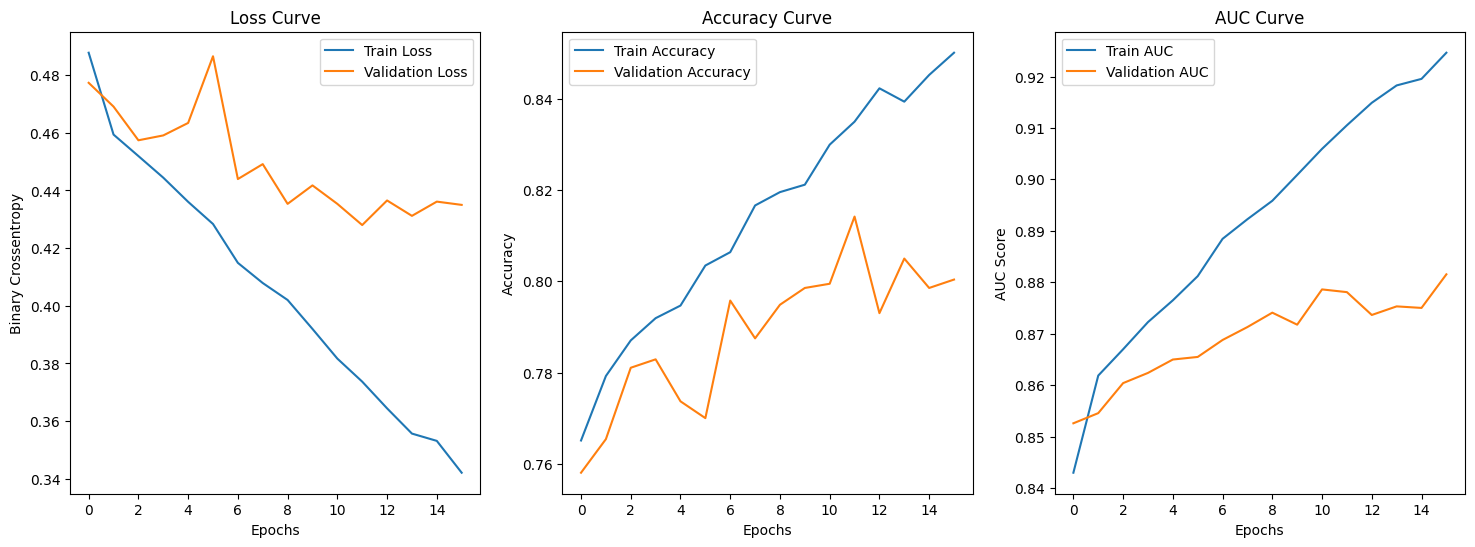

In [ ]:
plot_history(history_tuned_test_02)


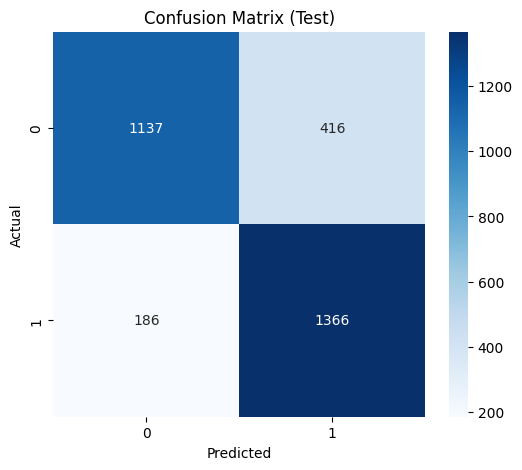

In [ ]:
# best_model.save("telco_ann_best_model.h5")
cm=confusion_matrix(y_test,y_pred_tuned_test_02)
cm
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
cm


#### Test 03 with improved hyperparamters

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(input_dim,)))
    # tune number of layers 1-3
    for i in range(hp.Int('num_layers', 2, 4)):
        units = hp.Int(f'units_{i}', min_value=16, max_value=256, step=16)
        model.add(keras.layers.Dense(units, activation='relu'))
        # optional dropout
        if hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1) > 0:
            model.add(keras.layers.Dropout(hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1)))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # optimizer + learning rate
    opt_choice = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    if opt_choice == 'adam':
        lr = hp.Float('adam_lr', 1e-4, 1e-2, sampling='log')
        optimizer = keras.optimizers.Adam(learning_rate=lr)
    elif opt_choice == 'rmsprop':
        lr = hp.Float('rmsprop_lr', 1e-4, 1e-2, sampling='log')
        optimizer = keras.optimizers.RMSprop(learning_rate=lr)
    else:
        lr = hp.Float('sgd_lr', 1e-4, 1e-2, sampling='log')
        optimizer = keras.optimizers.SGD(learning_rate=lr)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=[keras.metrics.AUC(name='auc'), 'accuracy'])
    return model

# Choose a tuner: RandomSearch or Hyperband
tuner_test_03 = kt.RandomSearch(
    build_model,
    objective=kt.Objective("val_auc", direction="max"),
    max_trials=250,
    executions_per_trial=1,
    directory='model_his',
    project_name='telco_churn_ann_Test_3'
)

# Run the tuner
tuner_test_03.search(X_train, y_train,
             epochs=100,
             validation_split=0.15,
             class_weight=class_weights,
             callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)],
             batch_size=64)


Trial 250 Complete [00h 00m 27s]
val_auc: 0.8619147539138794

Best val_auc So Far: 0.8881055116653442
Total elapsed time: 01h 27m 56s


In [ ]:
# 10. Get best model and evaluate on test
best_hps_test_03 = tuner_test_03.get_best_hyperparameters(num_trials=1)[0]
print(best_hps_test_03.values)

{'num_layers': 3, 'units_0': 176, 'dropout_0': 0.0, 'units_1': 160, 'dropout_1': 0.1, 'optimizer': 'adam', 'adam_lr': 0.00012400439514485958, 'units_2': 64, 'dropout_2': 0.2, 'units_3': 16, 'dropout_3': 0.1, 'sgd_lr': 0.0017921947583188819, 'rmsprop_lr': 0.00010815581616173686}


In [ ]:
# 1. Get the best hyperparameters
best_hps_test_03 = tuner_test_03.get_best_hyperparameters(1)[0]

# 2. Build the model using these hyperparameters
best_tuned_model_test_03 = build_model(best_hps_test_02)

# 3. Retrain the model so we get history (needed for visualization)
history_tuned_test_03 = best_tuned_model_test_03.fit(
    X_train, y_train,
    epochs=40,
    validation_split=0.15,
    class_weight=class_weights,
    batch_size=64,
    callbacks=[keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=4, restore_best_weights=True
    )],
    verbose=2
)

Epoch 1/40


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


97/97 - 1s - 14ms/step - accuracy: 0.7633 - auc: 0.8456 - loss: 0.4856 - val_accuracy: 0.7608 - val_auc: 0.8525 - val_loss: 0.4727
Epoch 2/40
97/97 - 0s - 3ms/step - accuracy: 0.7788 - auc: 0.8617 - loss: 0.4610 - val_accuracy: 0.7728 - val_auc: 0.8560 - val_loss: 0.4662
Epoch 3/40
97/97 - 0s - 3ms/step - accuracy: 0.7908 - auc: 0.8686 - loss: 0.4501 - val_accuracy: 0.7709 - val_auc: 0.8589 - val_loss: 0.4606
Epoch 4/40
97/97 - 0s - 3ms/step - accuracy: 0.7929 - auc: 0.8737 - loss: 0.4414 - val_accuracy: 0.7783 - val_auc: 0.8599 - val_loss: 0.4610
Epoch 5/40
97/97 - 0s - 3ms/step - accuracy: 0.7965 - auc: 0.8785 - loss: 0.4332 - val_accuracy: 0.7746 - val_auc: 0.8667 - val_loss: 0.4598
Epoch 6/40
97/97 - 0s - 3ms/step - accuracy: 0.8025 - auc: 0.8826 - loss: 0.4253 - val_accuracy: 0.7893 - val_auc: 0.8707 - val_loss: 0.4453
Epoch 7/40
97/97 - 0s - 3ms/step - accuracy: 0.8099 - auc: 0.8888 - loss: 0.4151 - val_accuracy: 0.8031 - val_auc: 0.8692 - val_loss: 0.4488
Epoch 8/40
97/97 - 0s -

In [ ]:
# Evaluate
y_pred_tuned_test_03_proba = best_tuned_model_test_03.predict(X_test).ravel()
y_pred_tuned_test_03 = (y_pred_tuned_test_03_proba >= 0.5).astype(int)
print("Test AUC:", roc_auc_score(y_test, y_pred_tuned_test_03_proba))
print("Test Accuracy:", accuracy_score(y_test, y_pred_tuned_test_03))
print(classification_report(y_test, y_pred_tuned_test_03))

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Test AUC: 0.8784606282486176
Test Accuracy: 0.8054750402576489
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1553
           1       0.77      0.88      0.82      1552

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.80      3105
weighted avg       0.81      0.81      0.80      3105



In [ ]:
print("\n=== Final Training vs Validation Performance ===")

# Get the metrics from the last epoch (or best epoch if early stopping restored weights)
train_loss = history_tuned_test_03.history['loss'][-1]
train_accuracy = history_tuned_test_03.history['accuracy'][-1]
train_auc = history_tuned_test_03.history['auc'][-1]

val_loss = history_tuned_test_03.history['val_loss'][-1]
val_accuracy = history_tuned_test_03.history['val_accuracy'][-1]
val_auc = history_tuned_test_03.history['val_auc'][-1]

print(f"Training   - Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}, AUC: {train_auc:.4f}")
print(f"Validation - Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}, AUC: {val_auc:.4f}")
print(f"Test       -        Accuracy: {accuracy_score(y_test, y_pred_tuned_test_03):.4f}, AUC: {roc_auc_score(y_test, y_pred_tuned_test_03_proba):.4f}")


=== Final Training vs Validation Performance ===
Training   - Loss: 0.3697, Accuracy: 0.8369, AUC: 0.9121
Validation - Loss: 0.4515, Accuracy: 0.7884, AUC: 0.8713
Test       -        Accuracy: 0.8055, AUC: 0.8785


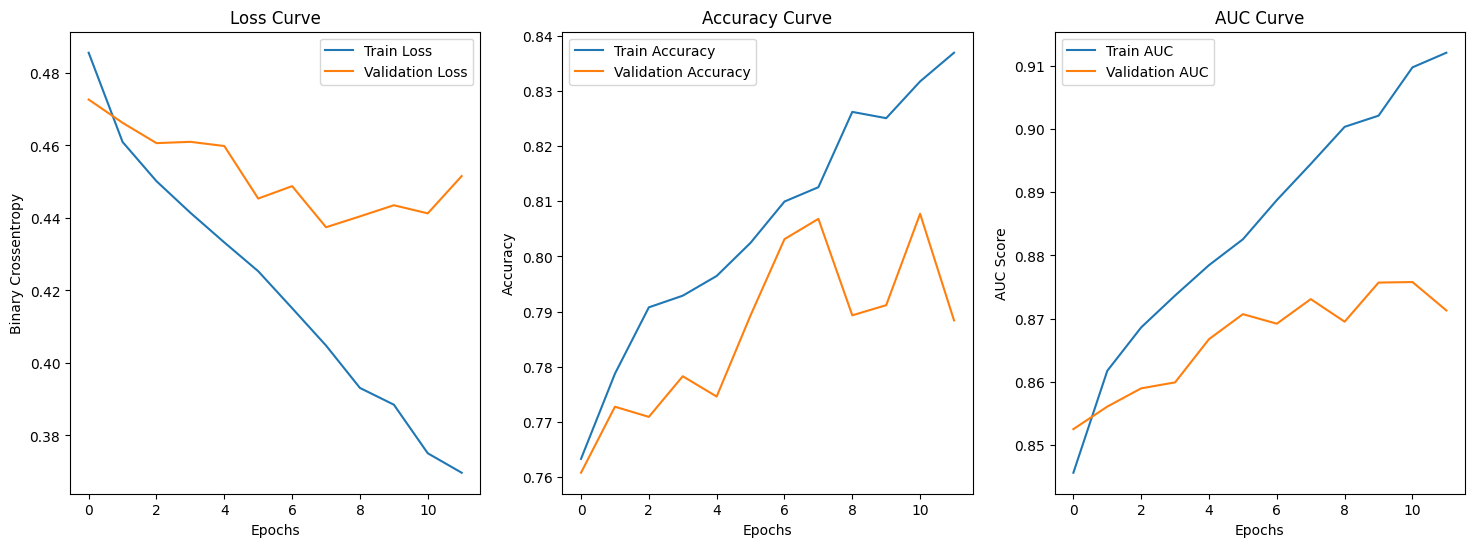

In [ ]:
plot_history(history_tuned_test_03)


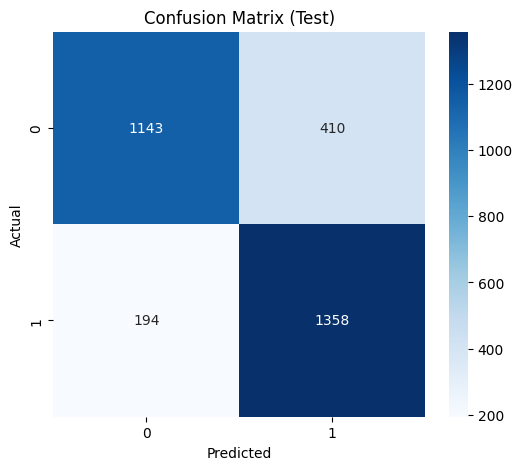

In [ ]:
cm=confusion_matrix(y_test,y_pred_tuned_test_03)
cm
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Decision Tree Traininig

#### Test 01

In [ ]:
dt_model = DecisionTreeClassifier(
    criterion="entropy",         # Use 'entropy' for information gain
    max_depth=6,             # Prevent overfitting
    min_samples_split=40,     # Minimum samples required for a split
    min_samples_leaf=20,      # Minimum samples per leaf
  # Handle class imbalance
    random_state=42
)

# Train model
dt_model.fit(X_train, y_train)


In [ ]:
y_pred = dt_model.predict(X_test)


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
y_pred_proba_deci_1 = dt_model.predict(X_test).ravel()
y_pred_deci_1 = (y_pred_proba_deci_1 >= 0.5).astype(int)
print("Test AUC:", roc_auc_score(y_test, y_pred_proba_deci_1))
print("Test Accuracy:", accuracy_score(y_test, y_pred_deci_1))
print(classification_report(y_test, y_pred_deci_1))

#### Test 02

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
from scipy.stats import randint, uniform

param_dist = {
    "criterion": ["gini", "entropy"],
    "max_depth": randint(3, 40),           # shallow to deep
    "min_samples_split": randint(2, 50),   # min samples to split
    "min_samples_leaf": randint(1, 30),    # leaf size
    "max_features": [None, "sqrt", "log2"],
    "ccp_alpha": uniform(0.0, 0.02),       # small alphas for pruning
    "class_weight": [None, "balanced"]
}
dt = DecisionTreeClassifier(random_state=42)


rs = RandomizedSearchCV(
    dt,
    param_distributions=param_dist,
    n_iter=150,                # number of parameter settings sampled
    scoring="roc_auc",        # or "f1" depending on priority
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=42,
    refit=True
)

rs.fit(X_train, y_train)

print("Best params (random search):", rs.best_params_)
print("Best cross-val ROC AUC:", rs.best_score_)
best_dt = rs.best_estimator_


In [ ]:
# use best_dt or final_dt from above
model = best_dt  # or final_dt

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Test precision:", precision_score(y_test, y_pred))
print("Test recall:", recall_score(y_test, y_pred))
print("Test f1:", f1_score(y_test, y_pred))
if y_prob is not None:
    print("Test ROC AUC:", roc_auc_score(y_test, y_prob))

print("\nClassification report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:

param_dist = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


rs = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=200,                # number of parameter settings sampled
    scoring="roc_auc",        # or "f1" depending on priority
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=42,
    refit=True
)

rs.fit(X_train, y_train)

print("Best params (random search):", rs.best_params_)
print("Best cross-val ROC AUC:", rs.best_score_)
best_dt = rs.best_estimator_


In [ ]:
# use best_dt or final_dt from above
model = best_dt  # or final_dt

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Test precision:", precision_score(y_test, y_pred))
print("Test recall:", recall_score(y_test, y_pred))
print("Test f1:", f1_score(y_test, y_pred))
if y_prob is not None:
    print("Test ROC AUC:", roc_auc_score(y_test, y_prob))

print("\nClassification report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### Before hyperparameter tuning and after tuning result comparision

In [ ]:
import shutil

# Zip the kt_tuner_dir folder
shutil.make_archive("model_his", 'zip', "model_his")

# Download the zipped folder
from google.colab import files
files.download("model_his.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#https://www.kaggle.com/code/rakkesharv/complete-guide-decision-trees-ml-modelling#8%EF%B8%8F%E2%83%A3-Python-Implementation---Decision-Tree